# AW-SGD

This Notebook compares the performance of SGD,AW-SGD,BB AW-SGD and min-var SGD on linear regression tasks with fake
and real data. 

If there is time, we will also look at a classification task with logisitc regression where there is a strong class imbalance.

## Linear Regression

In Our First Experiment We Compare the convergence of BB-AWSGD,Min-var SGD and Vanilla SGD on synthetic and then real data.

The output from these experiments should be:
* The median number of iterations to convergence on 10 successive trials (i.e The median learning rate curve)

In [1]:
from linear_regression_experiments import *
%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [48]:
# Get Data
N,D,sigma = 30,1,0.4
w_true,X,y = GenData(N,D,sigma)

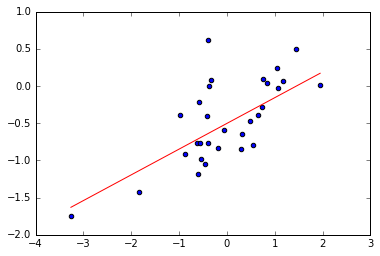

In [49]:
# Plot D
plt.scatter(X[:,0],y)
plt.plot(X[:,0],np.dot(X,w_true),'r')

In [174]:
# Perform The Three SGD Algorithms 10 Times and store the results

# Storage for the errors
max_iter = 100
errors_sgd = np.zeros((11,max_iter-1))
errors_MVsgd = np.zeros((11,max_iter -1))
errors_BBsgd = np.zeros((11,max_iter -1))
tol = 1e-6
w_true,X,y = GenData(N,D,sigma)
w_0 = np.random.randn(D+1,1)

for test in range(11):
    _, errors_MVsgd[test,:],_ = min_var_sgd(X,y,w_0,0.2,tol,max_iter)
    _, errors_sgd[test,:] = stochastic_gradient_descent(X,y,w_0,0.2,tol,max_iter)
    _, errors_BBsgd[test,:],_ = AW_SGD(X,y,w_0,0.0003,0.015,tol,max_iter)

errors_sgd = errors_sgd[errors_sgd[:,-1].argsort()]
errors_MVsgd = errors_MVsgd[errors_MVsgd[:,-1].argsort()]
errors_BBsgd = errors_BBsgd[errors_BBsgd[:,-1].argsort()]

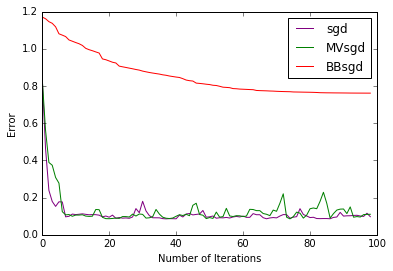

In [178]:
plt.figure()
plt.ylabel('Error')
plt.xlabel('Number of Iterations')
sgd, = plt.plot(errors_sgd[5,:],'purple')
plt.hold
MVsgd, = plt.plot(errors_MVsgd[5,:],'g')
BBsgd, = plt.plot(errors_BBsgd[5,:],'r')
plt.legend([sgd,MVsgd,BBsgd],['sgd','MVsgd','BBsgd'])
plt.savefig('MedianIterations.png')

# Investigating BB-AWSGD in More Detail

In this experiment the aim is to gain some intuition about wether or non BB-AW_SGD converges to anything interesting by running it with 0 learning rate on the same data and seeing if it converges to anything useful.

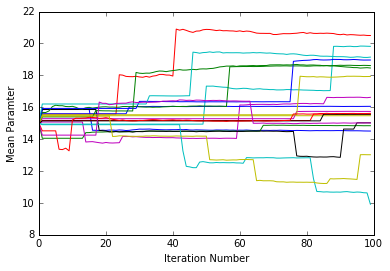

In [6]:
w_true,X,y = GenData(N,D,sigma)
w_0 = np.random.randn(D+1,1)
max_iter = 101
tol = 1e-3
taus_BBsgd = np.zeros((20,max_iter-1))
plt.figure()
plt.hold
for i in range(20):
    _,_,taus_BBsgd[i,:] = AW_SGD(X,y,w_0,0.0,0.03,tol,max_iter)
    plt.plot(taus_BBsgd[i,:])
plt.xlabel('Iteration Number')
plt.ylabel('Mean Paramter')
    
#plt.savefig('BB AW_SGD means.png')
    

# Investigating Min-Var in More Detail

In the next experiment we look at the sampling distribution learned by min-var after one epoch and compare it to the optimal sampling distribution at that point in time.

In [192]:
# Get Data
N,D,sigma = 30,1,0.4
w_true,X,y = GenData(N,D,sigma)
w_0 = np.random.randn(D+1,1)
max_iter = 31
tol = 1e-6




<Container object of 30 artists>

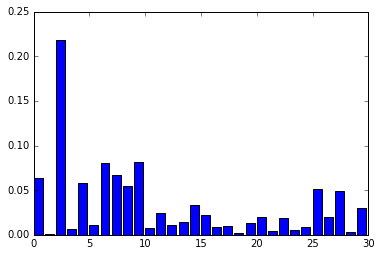

In [193]:
w, errors,dist = min_var_sgd(X,y,w_0,0.2,tol,max_iter)
plt.bar(range(N),dist.probs)

In [194]:
opt = np.zeros(N)

for index in range(N):
    delta = np.dot(X[index,:],w) - y[index]
    opt[index] = np.linalg.norm(delta*X[index:index+1,:].transpose())

<Container object of 30 artists>

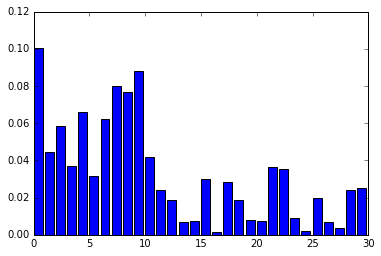

In [195]:
plt.bar(range(N),opt/np.sum(opt))

# Now We investigate the Perofmance on Real Data

Now we look at some real data to compare performance on a slightly larger task

In [2]:
# Get the Boston Housing Data
Data = np.loadtxt('Data/housing.data.txt')
labels = Data[:,13:14]
attr = Data[:,[0,1,2,4,5,6,7,8,9,10,11,12]]
tol = 1e-3
max_iter = 50
D = np.shape(attr)[1]
N = np.shape(attr)[0]
w_0 = np.random.randn(D,1)

In [13]:
real_errors_sgd = np.zeros((11,max_iter-1))
real_errors_MVsgd = np.zeros((11,max_iter-1))

for test in range(11):
    _, real_errors_MVsgd[test,:],_ = min_var_sgd(attr,labels,w_0,0.000001,tol,max_iter)
    _, real_errors_sgd[test,:] = stochastic_gradient_descent(attr,labels,w_0,0.000001,tol,max_iter)

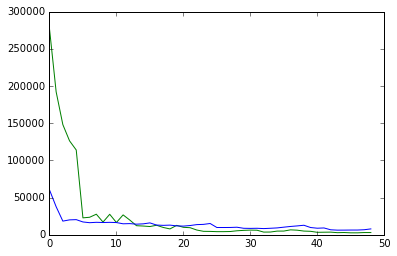

In [14]:
plt.plot(real_errors_MVsgd[6],'g')
plt.hold
plt.plot(real_errors_sgd[6])

In [9]:
np.shape(labels)

(506,)